In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset Loading

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Algorithms/6-Decision Tree/car_evaluation.csv", header=None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


##Exploratory data analysis

In [5]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
##Renaming the columns
col_names = ['price', 'maintainence', 'doors', 'persons', 'boot_space', 'safety', 'class']

df.columns = col_names

col_names

['price', 'maintainence', 'doors', 'persons', 'boot_space', 'safety', 'class']

In [8]:
df.head()

,price,maintainence,doors,persons,boot_space,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         1728 non-null   object
 1   maintainence  1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   boot_space    1728 non-null   object
 5   safety        1728 non-null   object
 6   class         1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


##Data Preparation

In [10]:
X = df.drop(['class'], axis=1)
y = df['class']

In [11]:
##train test plot
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

##Feature Engineering

In [15]:
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [17]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['price', 'maintainence', 'doors', 'persons', 'boot_space', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

##Decision Tree Classifier with gini index

In [18]:
## apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [20]:
y_pred_gini = clf_gini.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7977


[Text(0.4, 0.875, 'x[5] <= 1.5\ngini = 0.462\nsamples = 1382\nvalue = [320, 56, 959, 47]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 458\nvalue = [0, 0, 458, 0]'),
 Text(0.6, 0.625, 'x[3] <= 2.5\ngini = 0.58\nsamples = 924\nvalue = [320, 56, 501, 47]'),
 Text(0.4, 0.375, 'x[1] <= 2.5\ngini = 0.62\nsamples = 628\nvalue = [320, 56, 205, 47]'),
 Text(0.2, 0.125, 'gini = 0.526\nsamples = 320\nvalue = [150, 0, 161, 9]'),
 Text(0.6, 0.125, 'gini = 0.627\nsamples = 308\nvalue = [170, 56, 44, 38]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 296\nvalue = [0, 0, 296, 0]')]

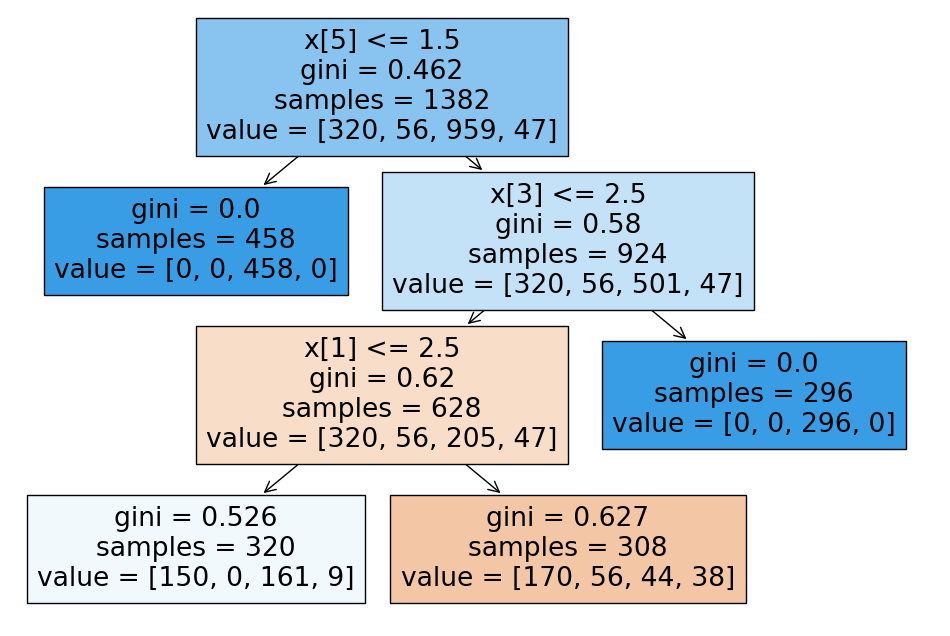

In [23]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train),filled=True)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
cm=confusion_matrix(y_test,y_pred_gini)
print(cm)
print(classification_report(y_test,y_pred_gini))

[[ 37   0  27   0]
 [ 13   0   0   0]
 [ 12   0 239   0]
 [ 14   0   4   0]]
              precision    recall  f1-score   support

         acc       0.49      0.58      0.53        64
        good       0.00      0.00      0.00        13
       unacc       0.89      0.95      0.92       251
       vgood       0.00      0.00      0.00        18

    accuracy                           0.80       346
   macro avg       0.34      0.38      0.36       346
weighted avg       0.73      0.80      0.76       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree Classifier with entropy

In [26]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [27]:
y_pred_en = clf_en.predict(X_test)

In [29]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7977


[Text(0.4, 0.875, 'x[5] <= 1.5\nentropy = 1.208\nsamples = 1382\nvalue = [320, 56, 959, 47]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 458\nvalue = [0, 0, 458, 0]'),
 Text(0.6, 0.625, 'x[3] <= 2.5\nentropy = 1.472\nsamples = 924\nvalue = [320, 56, 501, 47]'),
 Text(0.4, 0.375, 'x[1] <= 2.5\nentropy = 1.614\nsamples = 628\nvalue = [320, 56, 205, 47]'),
 Text(0.2, 0.125, 'entropy = 1.156\nsamples = 320\nvalue = [150, 0, 161, 9]'),
 Text(0.6, 0.125, 'entropy = 1.694\nsamples = 308\nvalue = [170, 56, 44, 38]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 296\nvalue = [0, 0, 296, 0]')]

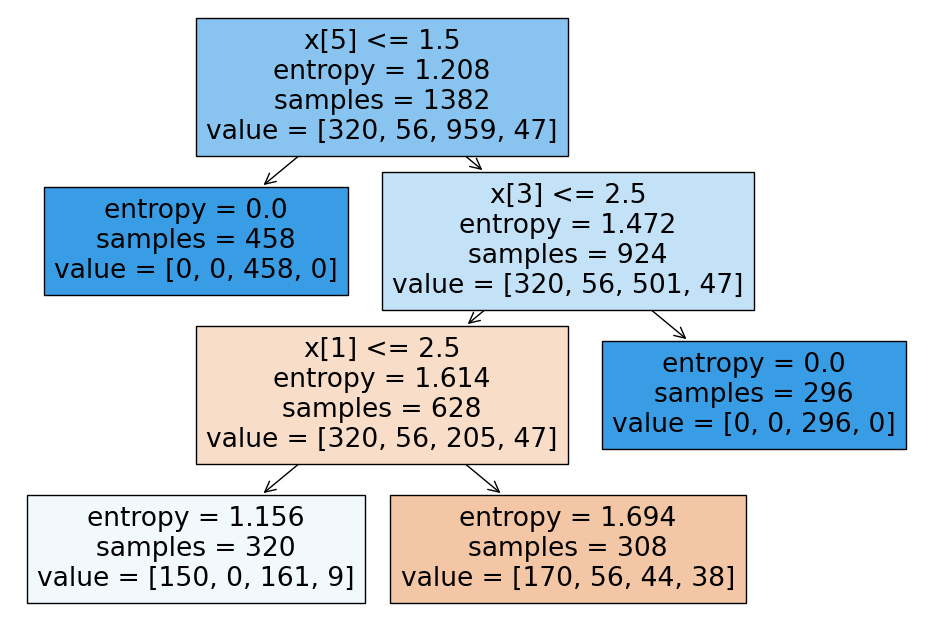

In [31]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_en.fit(X_train, y_train),filled=True)

In [32]:
cm=confusion_matrix(y_test,y_pred_en)
print(cm)
print(classification_report(y_test,y_pred_en))

[[ 37   0  27   0]
 [ 13   0   0   0]
 [ 12   0 239   0]
 [ 14   0   4   0]]
              precision    recall  f1-score   support

         acc       0.49      0.58      0.53        64
        good       0.00      0.00      0.00        13
       unacc       0.89      0.95      0.92       251
       vgood       0.00      0.00      0.00        18

    accuracy                           0.80       346
   macro avg       0.34      0.38      0.36       346
weighted avg       0.73      0.80      0.76       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
